In [2]:
import numpy as np
import plotly.express as px
import pandas as pd

Анодный эффект

In [2]:
import numpy as np
from PIL import Image

img = Image.open("Анодный эффект.jpg")

img = np.asarray(img)
a = (255-img[:,:,0])
a = 0.19+(0.21-0.19)*(a/np.max(a))

a = (a - 0.2)*1.5+0.2

f = open("anodeffect2.txt", "w", encoding="utf-8")

for i in range(a.shape[0]):
    f.write(np.array2string(a[i]).replace('\n','').replace('[','').replace(']','\n'))

f.close()

Первая формула

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(S,i,L,T):
    return ((1-2567*(S**0.21)/(i**0.58)/L/np.exp(12940/T))*100)


S = 17.5
i = 1.5
L = 0.06
t = 960

y = f(S, i, L, t)

print(y)

91.36520613531275


Построить поверхность

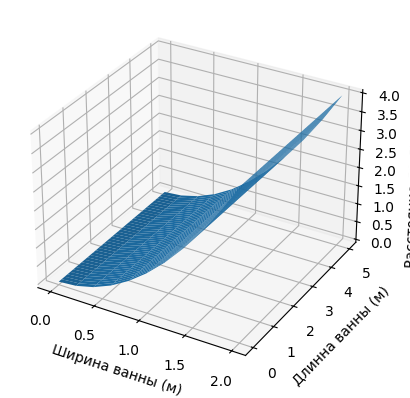

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.ones((11))
y = np.ones((40))

x = np.linspace(0,1,11)
y = np.linspace(0,1,40)

a = np.zeros((40,11))

vx = np.linspace(0,1,a.shape[0]//3+1)
dx = np.linspace(0,1,a.shape[0])

low = 0.25
high = 0.29
a = a + low
for i in range(a.shape[0]):
	if i>a.shape[0]//3*2:
		a[i] = (a[i] + x*(high-low)*dx[i]*vx[i-a.shape[0]//3*2])
	a[i] = a[i] + (0.5-abs(x-0.5))*0.01

dy = np.linspace(0,1,a.shape[1])
vy = np.linspace(0,1,a.shape[1]//3+1)

for i in range(a.shape[1]):
	if i>a.shape[1]//3*2:
		a[:,i] = (a[:,i] + y*(high-low)*dy[i]*vx[i-a.shape[1]//3*2])
	a[:,i] = a[:,i] + (0.5-abs(y-0.5))*0.01

#a = a+ np.random.rand(a.shape[0], a.shape[1])*0.001

a[-1] = a[-2]
a[0] = a[1]
a[:,0] = a[:,1]
a[:,-1] = a[:,-2]

'''
a = a+0.22
for i in range(a.shape[0]):
	a[i] = (a[i] + x*(0.25-0.216)/6)
	if i<a.shape[0]//3:
		a[i] = (a[i] + x*(0.25-0.216)/6*v[-i])
	elif i>=a.shape[0]//3*2:
		a[i] = (a[i] + x*(0.25-0.216)/6*v[i-a.shape[0]//3*2])
	a[i] = a[i] + (0.5-abs(x-0.5))*0.01

for i in range(a.shape[1]):
	a[:,i] = (a[:,i] + y*(0.25-0.216)/2)
	a[:,i] = a[:,i] + (0.5-abs(y-0.5))*0.01

a = a+ np.random.rand(a.shape[0], a.shape[1])*0.001
'''


'''
a = a+0.22
for i in range(a.shape[0]):
	a[i] = (a[i] + x*(0.3-0.216)/6)
	if i<a.shape[0]//3:
		a[i] = (a[i] + x*(0.3-0.216)/6*v[-i])
	elif i>=a.shape[0]//3*2:
		a[i] = (a[i] + x*(0.3-0.216)/6*v[i-a.shape[0]//3*2])
	a[i] = a[i] + (0.5-abs(x-0.5))*0.02

for i in range(a.shape[1]):
	a[:,i] = (a[:,i] + y*(0.3-0.216)/2)
	a[:,i] = a[:,i] + (0.5-abs(y-0.5))*0.02

a = a+ np.random.rand(a.shape[0], a.shape[1])*0.001

'''

x, y = np.meshgrid(x*3.5, y*10)
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, a)
ax.plot_surface(x, y, np.ones(a.shape)*0.2, alpha=0)
ax.set_xlabel('Ширина ванны (м)')
ax.set_ylabel('Длинна ванны (м)')
ax.set_zlabel('Расстояние до дна ванны (м)')

plt.show()

f = open("surf2.txt", "w", encoding="utf-8")

for i in range(a.shape[0]):
    f.write(np.array2string(a[i]).replace('\n','').replace('[','').replace(']','\n'))

f.close()

Вторая формула

In [ ]:
f = open("surf.txt", "r", encoding="utf-8")

data = []
for line in f:
    data_line = line.split()
    for i in range(len(data_line)):
        data_line[i] = float(data_line[i])
    data.append(data_line)

h = data

f.close()

sum = 0
eta = 0.98
h_x = 3.5/len(data)
h_y = 10/len(line)
for line in data:
    for ch in line:
#        sum = sum + (0.6-ch)*0.666*(0.113333*0.151613)/ch
#        sum = sum + (h_x*h_y)/ch
        sum = sum + (h_x*h_y)*(0.6-ch)/ch

#sum = sum * (0.6-data[4][30])*(1-eta)/31.96 
sum = sum * (1-eta)/31.96 
print(sum)

Триангуляция

In [11]:
import numpy as np

class Grid():
    """A class that stores triangles and their order in a grid"""

    def __init__(self, x, y, z):
        self.triangles = []
        for i1 in range(len(x)-1):
            for i2 in range(len(y)-1):
                self.triangles.append([])
                self.triangles[-1].append(Triangle([x[i1], y[i2], z[i1][i2]],
                                                  [x[i1+1], y[i2], z[i1+1][i2]],
                                                  [x[i1], y[i2+1], z[i1][i2+1]]))
                self.triangles[-1].append(Triangle([x[i1+1], y[i2+1], z[i1+1][i2+1]],
                                                  [x[i1], y[i2+1], z[i1][i2+1]],
                                                  [x[i1+1], y[i2], z[i1+1][i2]]))

    def integral(self):
        """Calculating the integral sum for all triangles"""
        sum = 0
        for square in self.triangles:
            for triangle in square:
                sum += triangle.intpart()
        eta_0 = 0.98
        #Squ = 15.8792448
        Squ = 17.5
        dot = [7,30]
        dot[0] = dot[0]-1
        dot[1] = dot[1]-1
#        return (1-eta_0)*(0.6-anod-z[dot[0]][dot[1]])/Squ*sum
        return (1-eta_0)/Squ*sum

    def square(self):
        """Calculating the surface area"""
        sum = 0
        for square in self.triangles:
            for triangle in square:
                sum += triangle.squarepart()
        return sum


class Triangle():
    '''the class containing the corner points of a triangle,
    its area and the corresponding value of the function'''

    def __init__(self, dot1, dot2, dot3):
        self.a = np.array(dot1)
        self.b = np.array(dot2)
        self.c = np.array(dot3)

    def square(self):
        return np.linalg.norm(np.cross(self.a-self.b, self.a-self.c))/2

    def function(self):
        return ((f(self.a[2])+f(self.b[2])+f(self.c[2]))/3)

    def intpart(self):
        return self.square()*self.function()
    
    def squarepart(self):
        return self.square()

    def print(self):
        print(self.a, self.b, self.c)


def f(h):
    '''integral function'''
    return ((0.6-anod)-h)/h
    #return 1/h


file_name="surf2.txt"
anod = 0.28


file = open(file_name, "r", encoding="utf-8")
leny = len(file.readline().split())
lenx = len(file.readlines())+1
file.close()

#x = np.linspace(0, 3.4, lenx)
#y = np.linspace(0, 9.4, leny)

#x = np.linspace(0, 2, lenx)
#y = np.linspace(0, 5, leny)

x = np.linspace(0, 10, lenx)
y = np.linspace(0, 3.5, leny)

z = []

file = open(file_name, "r", encoding="utf-8")

data = []
for line in file:
    data_line = line.split()
    for i in range(len(data_line)):
        data_line[i] = float(data_line[i])
    data.append(data_line)

h = data

file.close()


for i1 in range(len(x)):
    z.append([])
    for i2 in range(len(y)):
        z[-1].append(h[i1][i2])


grid = Grid(x, y, z)
x = np.outer(x, np.ones(len(y)))
y = np.outer(y, np.ones(len(x))).T
z = np.array(z)
zero = np.zeros(z.shape)

print(grid.integral())

0.009451454049373512


In [5]:
print(grid.square())

35.01860223684619


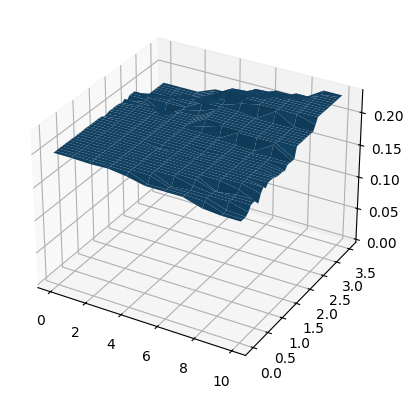

In [63]:
import matplotlib.pyplot as plt
# Creating figure
fig = plt.figure()
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x, y, z)
ax.plot_surface(x, y, np.zeros(z.shape)*0.2, alpha=0)

plt.show()

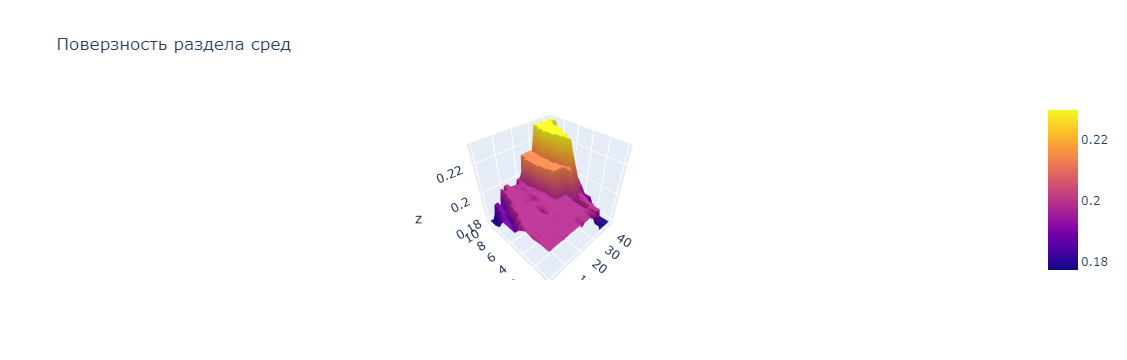

In [62]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

df = pd.DataFrame(z, index=np.linspace(0, 10, lenx), columns=np.linspace(0, 3.5, leny))

fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title='Поверзность раздела сред', autosize=False, width=400)
fig.show()

Построить диаграмму МПР

In [6]:
import numpy as np
import plotly.express as px
import pandas as pd

In [70]:
file_path = "anodeffect.txt"
f = open(file_path, "r", encoding="utf-8")

d = []

x = np.linspace(0,3.4, 31)
y = np.linspace(0,9.4, 11)

x, y = np.meshgrid(x, y)

for line in f:
    data = line.split()
    d.append([])
    for i in data:
        d[-1].append(float(i))

d = np.array(d)

f.close()

d = abs(0.6-0.25-d)

In [7]:
def plot_imshow(file_name):
    file = open(file_name, "r", encoding="utf-8")
    leny = len(file.readline().split())
    lenx = len(file.readlines())+1
    file.close()
    
    #x = np.linspace(0, 3.4, lenx)
    #y = np.linspace(0, 9.4, leny)
    
    #x = np.linspace(0, 2, lenx)
    #y = np.linspace(0, 5, leny)
    
    x = np.linspace(0, 10, lenx)
    y = np.linspace(0, 3.5, leny)
    
    z = []
    
    file = open(file_name, "r", encoding="utf-8")
    
    data = []
    for line in file:
        data_line = line.split()
        for i in range(len(data_line)):
            data_line[i] = float(data_line[i])
        data.append(data_line)
    
    h = data
    
    file.close()

    h = pd.DataFrame(h)
    h = abs(0.6-0.25-h)

    print(h.shape)

    fig = px.imshow(h)
    x = np.linspace(start=0, stop=10, num=h.shape[0])
    y = np.linspace(start=0, stop=3.5, num=h.shape[1])
    title = 'Распределение МПР'
    labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
    fig = px.imshow(h.T,x=x, y=y, color_continuous_scale='gray_r', labels=labels, title=title, width=650)
    fig.show()

In [10]:
file_name="h.txt"
plot_imshow(file_name)

(11, 31)


Анодный эффект

In [11]:
file_name="anodeffect.txt"
plot_imshow(file_name)

(11, 44)


Выемка анодов

In [12]:
file_name="surf1.txt"
plot_imshow(file_name)

(40, 11)


In [8]:
file_name="h.txt"
plot_imshow(file_name)

(11, 31)


In [9]:
file_name="anodeffect.txt"
plot_imshow(file_name)

(11, 44)


In [10]:
file_name="surf1.txt"
plot_imshow(file_name)

(40, 11)


In [ ]:
import numpy as np

class Grid():
    """A class that stores triangles and their order in a grid"""

    def __init__(self, x, y, z):
        self.triangles = []
        for i1 in range(len(x)-1):
            for i2 in range(len(y)-1):
                self.triangles.append([])
                self.triangles[-1].append(Triangle([x[i1], y[i2], z[i1][i2]],
                                                  [x[i1+1], y[i2], z[i1+1][i2]],
                                                  [x[i1], y[i2+1], z[i1][i2+1]]))
                self.triangles[-1].append(Triangle([x[i1+1], y[i2+1], z[i1+1][i2+1]],
                                                  [x[i1], y[i2+1], z[i1][i2+1]],
                                                  [x[i1+1], y[i2], z[i1+1][i2]]))

    def integral(self):
        """Calculating the integral sum for all triangles"""
        sum = 0
        triangles = []
        Squ = 0
        for square in self.triangles:
            triangles.append([])
            for triangle in square:
                triangles[-1].append(triangle.intpart())
                Squ += triangle.squarepart()
        eta_0 = 0.98
        #Squ = 15.8792448
        #Squ = 17.5
        dot = [7,30]
        dot[0] = dot[0]-1
        dot[1] = dot[1]-1
#        return (1-eta_0)*(0.6-anod-z[dot[0]][dot[1]])/Squ*sum
#        return (1-eta_0)/Squ*sum
        triangles = (1-eta_0)/Squ*np.array(triangles)
        return triangles

    def square(self):
        """Calculating the surface area"""
        sum = 0
        for square in self.triangles:
            for triangle in square:
                sum += triangle.squarepart()
        return sum


class Triangle():
    '''the class containing the corner points of a triangle,
    its area and the corresponding value of the function'''

    def __init__(self, dot1, dot2, dot3):
        self.a = np.array(dot1)
        self.b = np.array(dot2)
        self.c = np.array(dot3)

    def square(self):
        return np.linalg.norm(np.cross(self.a-self.b, self.a-self.c))/2

    def function(self):
        return ((f(self.a[2])+f(self.b[2])+f(self.c[2]))/3)

    def intpart(self):
        return self.square()*self.function()
    
    def squarepart(self):
        return self.square()

    def print(self):
        print(self.a, self.b, self.c)


def f(h):
    '''integral function'''
    return ((0.6-anod)-h)/h
    #return 1/h


file_name="surf2.txt"
anod = 0.28


file = open(file_name, "r", encoding="utf-8")
leny = len(file.readline().split())
lenx = len(file.readlines())+1
file.close()

#x = np.linspace(0, 3.4, lenx)
#y = np.linspace(0, 9.4, leny)

#x = np.linspace(0, 2, lenx)
#y = np.linspace(0, 5, leny)

x = np.linspace(0, 10, lenx)
y = np.linspace(0, 3.5, leny)

z = []

file = open(file_name, "r", encoding="utf-8")

data = []
for line in file:
    data_line = line.split()
    for i in range(len(data_line)):
        data_line[i] = float(data_line[i])
    data.append(data_line)

h = data

file.close()


for i1 in range(len(x)):
    z.append([])
    for i2 in range(len(y)):
        z[-1].append(h[i1][i2])


grid = Grid(x, y, z)
x = np.outer(x, np.ones(len(y)))
y = np.outer(y, np.ones(len(x))).T
z = np.array(z)
zero = np.zeros(z.shape)

# Creating figure
fig = plt.figure()
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(x, y, z)
ax.plot_surface(x, y, zero, alpha = 0)

plt.show()

print(grid.integral())

0.009451454049373512


In [3]:
file_name = 'cr.txt'

file = open(file_name, "r", encoding="utf-8")
leny = len(file.readline().split())
lenx = len(file.readlines())+1
file.close()

file = open(file_name, "r", encoding="utf-8")

data = []
for line in file:
	data_line = line.split()
	for i in range(len(data_line)):
		data_line[i] = float(data_line[i])
	data.append(data_line)

h = data

file.close()

h = pd.DataFrame(h)

print(h.shape)

fig = px.imshow(h)
x = np.linspace(start=0, stop=10, num=h.shape[0])
y = np.linspace(start=0, stop=3.5, num=h.shape[1])
title = 'Распределение МПР'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
fig = px.imshow(h.T,x=x, y=y, color_continuous_scale='gray_r', labels=labels, title=title, width=650)
fig.show()

(83, 30)


In [7]:
file_name = 'interpol.txt'

file = open(file_name, "r", encoding="utf-8")
leny = len(file.readline().split())
lenx = len(file.readlines())+1
file.close()

file = open(file_name, "r", encoding="utf-8")

data = []
for line in file:
	data_line = line.split()
	for i in range(len(data_line)):
		data_line[i] = float(data_line[i])
	data.append(data_line)

h = data

file.close()

h = pd.DataFrame(h)

print(h.shape)

fig = px.imshow(h)
x = np.linspace(start=0, stop=10, num=h.shape[0])
y = np.linspace(start=0, stop=3.5, num=h.shape[1])
title = 'Распределение МПР'
labels = {'x':'Длинна ванны', 'y':'Ширина ванны'}
fig = px.imshow(h.T,x=x, y=y, color_continuous_scale='gray_r', labels=labels, title=title, width=650)
fig.show()

(59, 165)
